In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

## Logistic Regression with ROC curve and roc auc

In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [13]:
X,y = make_classification(n_samples=1000, n_classes=2, random_state=1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800, 20), (200, 20), (800,), (200,))

In [19]:
# create a dummy model with dfault 0 as output
dummy_modal = [0 for _ in range(len(X_test))]

# print(dummy_modal)
dummy_modal

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [25]:

print(accuracy_score(y_test, dummy_modal))
print(roc_auc_score(y_test, dummy_modal))

0.45
0.5


In [26]:
# basic logstic regression
model = LogisticRegression()
model.fit(X_train, y_train)
model_pred = model.predict_proba(X_test)



In [27]:
### lets focuse on positive outcome 
model_prob = model_pred[:,1]


In [28]:
model_pred

array([[9.53627565e-01, 4.63724347e-02],
       [3.59690792e-01, 6.40309208e-01],
       [4.34739583e-01, 5.65260417e-01],
       [1.14371889e-01, 8.85628111e-01],
       [3.86375549e-01, 6.13624451e-01],
       [5.62375479e-01, 4.37624521e-01],
       [6.40987288e-02, 9.35901271e-01],
       [7.44526692e-01, 2.55473308e-01],
       [9.56397606e-01, 4.36023942e-02],
       [9.68081329e-01, 3.19186712e-02],
       [1.13575126e-01, 8.86424874e-01],
       [5.29341550e-01, 4.70658450e-01],
       [1.82079436e-01, 8.17920564e-01],
       [9.69352366e-01, 3.06476345e-02],
       [2.26230571e-01, 7.73769429e-01],
       [5.99166601e-01, 4.00833399e-01],
       [5.97966194e-01, 4.02033806e-01],
       [9.91833302e-01, 8.16669768e-03],
       [6.35945140e-01, 3.64054860e-01],
       [9.87264946e-01, 1.27350541e-02],
       [9.84281763e-01, 1.57182369e-02],
       [3.72477906e-02, 9.62752209e-01],
       [8.18815041e-01, 1.81184959e-01],
       [2.60084966e-02, 9.73991503e-01],
       [2.662139

In [10]:
# print(accuracy_score(y_test, y_pred))
# print(roc_auc_score(y_test, y_pred))

In [29]:
dummy_model_auc = roc_auc_score(y_test,dummy_modal)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9211111111111112


# False positive rate
- fp/n =fp/(fp+tn)



In [40]:
dummy_fpr,dummy_tfr,_=roc_curve(y_test,dummy_modal)
model_fpr,model_tpr,thresholds= roc_curve(y_test,model_prob)

In [41]:
model_fpr,model_tpr,_

(array([0.        , 0.        , 0.        , 0.01111111, 0.01111111,
        0.02222222, 0.02222222, 0.03333333, 0.03333333, 0.04444444,
        0.04444444, 0.05555556, 0.05555556, 0.06666667, 0.06666667,
        0.07777778, 0.07777778, 0.08888889, 0.08888889, 0.1       ,
        0.1       , 0.11111111, 0.11111111, 0.12222222, 0.12222222,
        0.13333333, 0.13333333, 0.14444444, 0.14444444, 0.15555556,
        0.15555556, 0.16666667, 0.16666667, 0.17777778, 0.17777778,
        0.21111111, 0.21111111, 0.22222222, 0.22222222, 0.31111111,
        0.31111111, 0.35555556, 0.35555556, 0.45555556, 0.45555556,
        0.47777778, 0.47777778, 0.53333333, 0.53333333, 0.92222222,
        0.92222222, 1.        ]),
 array([0.        , 0.00909091, 0.31818182, 0.31818182, 0.40909091,
        0.40909091, 0.42727273, 0.42727273, 0.45454545, 0.45454545,
        0.49090909, 0.49090909, 0.61818182, 0.61818182, 0.66363636,
        0.66363636, 0.69090909, 0.69090909, 0.7       , 0.7       ,
        0.7090

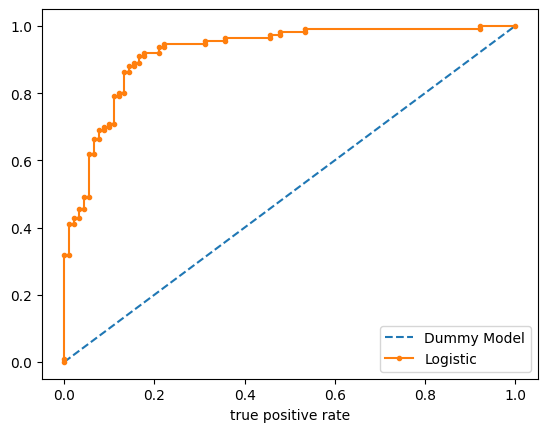

In [42]:
plt.plot(dummy_fpr,dummy_tfr,linestyle='--', label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',label='Logistic')

plt.xlabel('false positive rate')
plt.xlabel('true positive rate')
plt.legend()
plt.show()

In [43]:
# np.round(2.5234,decimals=2)

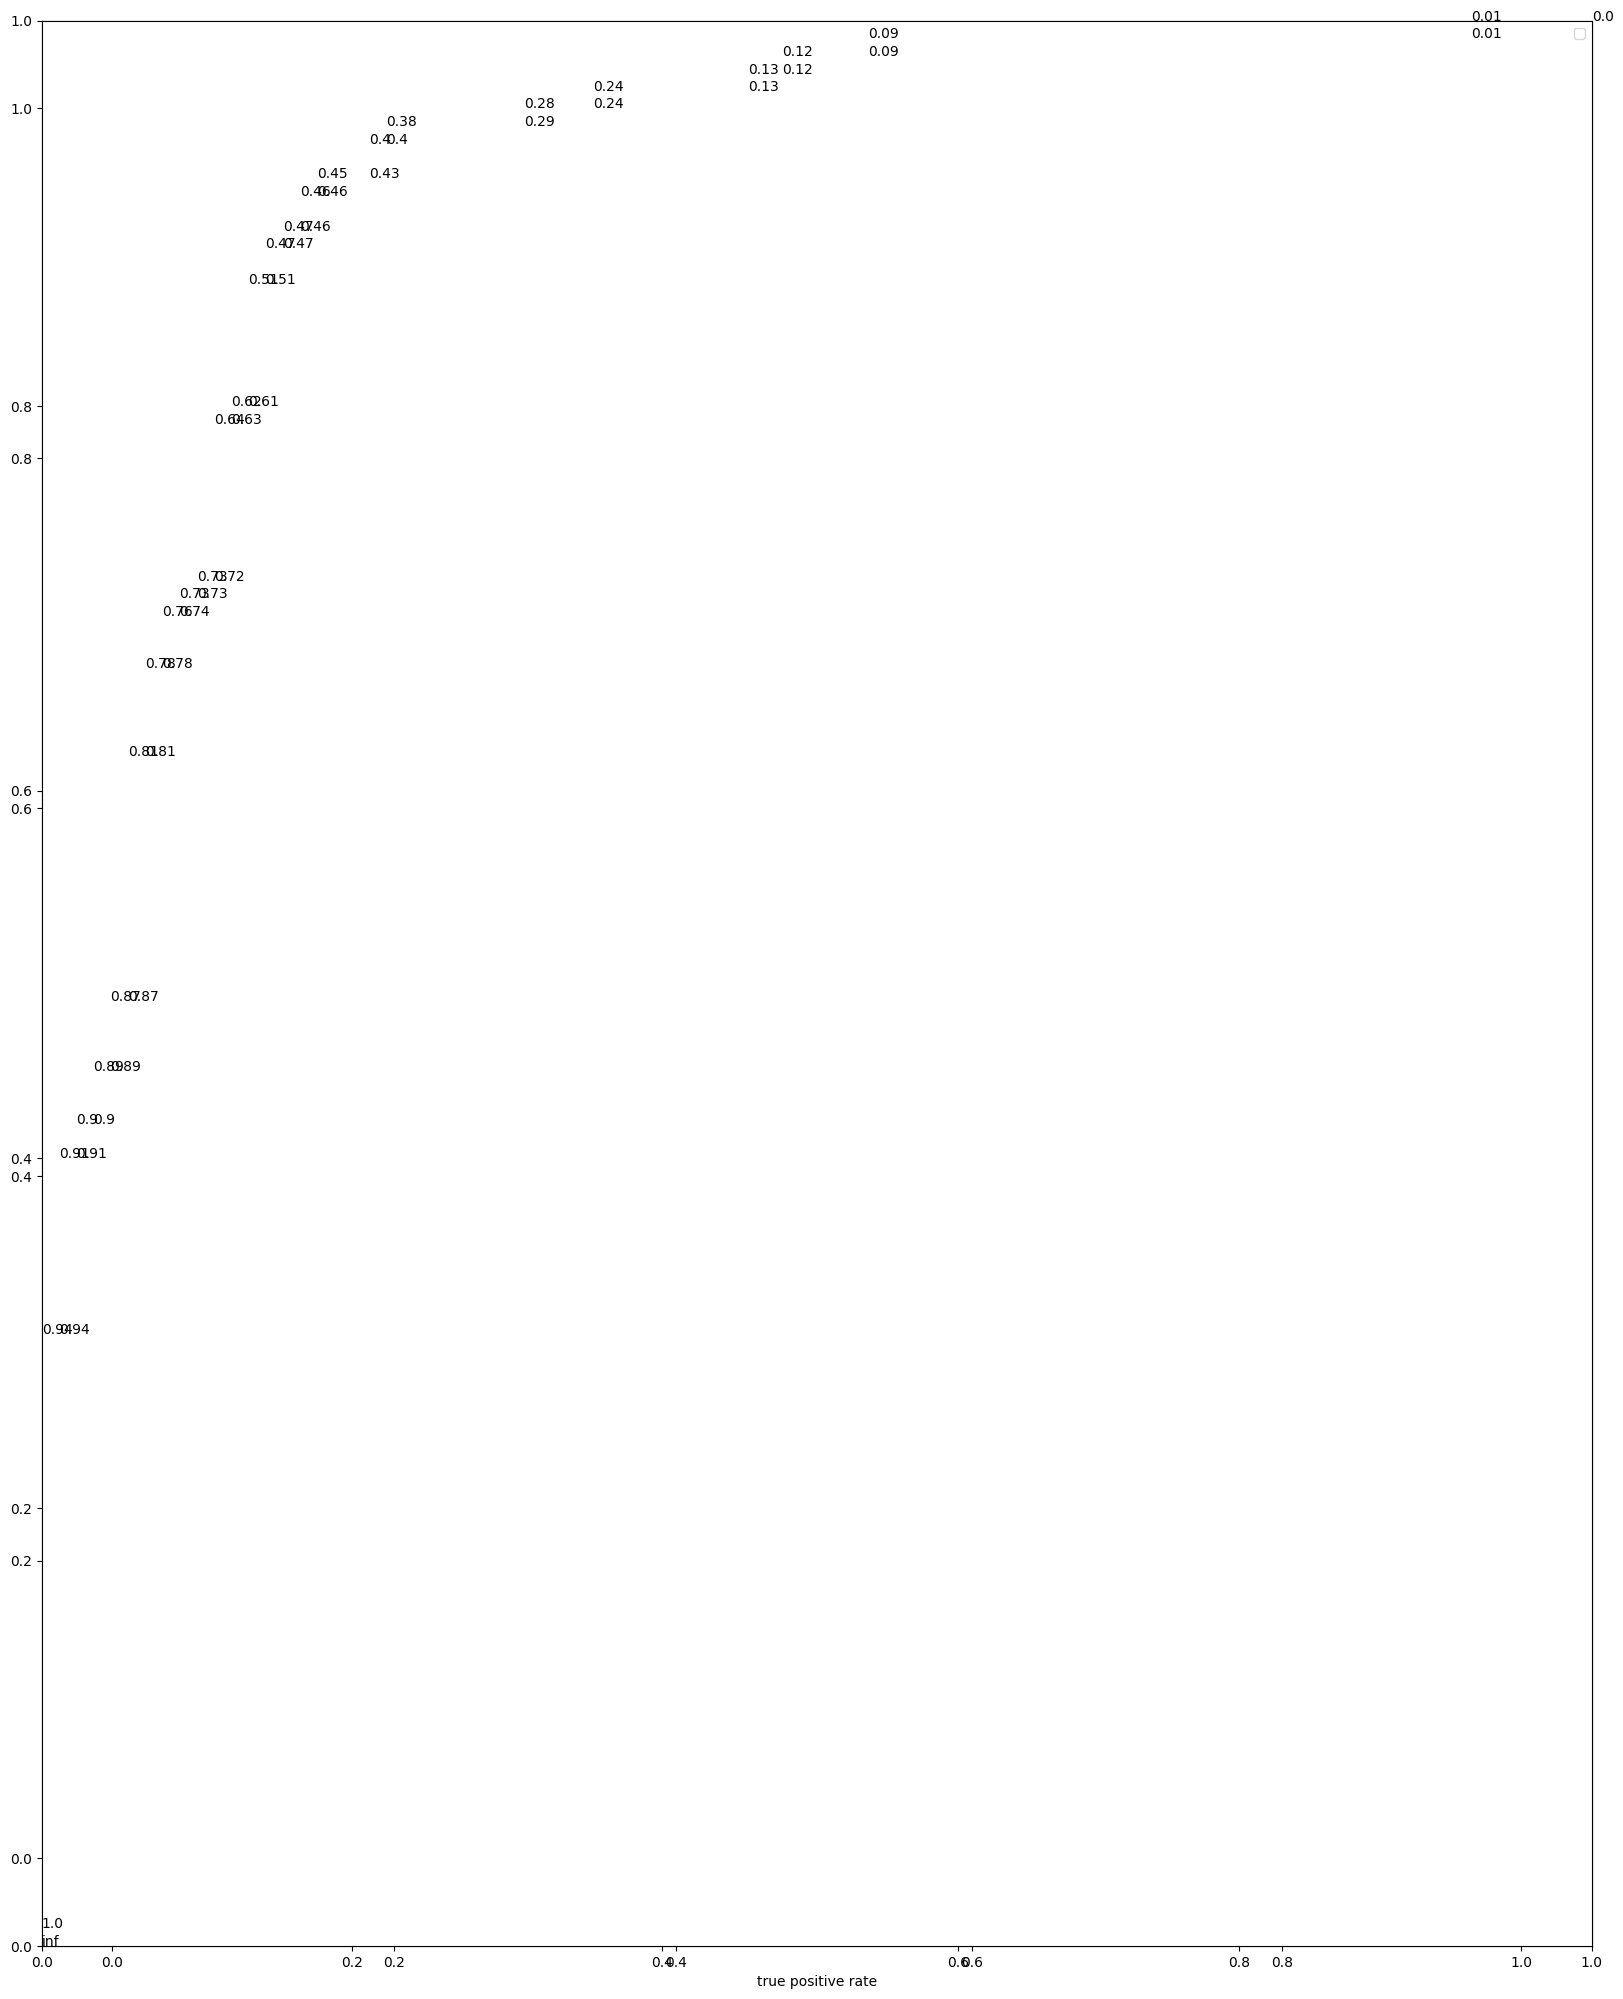

In [48]:
import numpy as np
fig = plt.figure(figsize=(20,25))
plt.plot(dummy_fpr,dummy_tfr,linestyle='--',color='r', label='Dummy Model')
plt.plot(model_fpr,model_tpr,marker='.',color='b',label='Logistic')
ax= fig.add_subplot(111)
for xyz in zip(model_fpr,model_tpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2),xy=(xyz[0],xyz[1]))

plt.xlabel('false positive rate')
plt.xlabel('true positive rate')
plt.legend()
plt.show()